# Linear Regression

- Linear Regression
- Multiple Linear Regression
- ANOVA
- LASSO
- Ridge Regression
- Evaluation Methods

In [1]:
# Get working directory
import os
os.getcwd()

'C:\\Users\\roger\\OneDrive\\Github\\Data-Mining'

## 1. Load Data

In [2]:
# Read in csv file for World War 2 weather conditions that is stored in path:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
url = 'https://raw.githubusercontent.com/RogerCui-GitHub/Data-Mining/master/datasets/Summary%20of%20Weather.csv'
ww2_weath = pd.read_csv('./datasets/Summary of Weather.csv', low_memory=False)
#low_memory=False:
#c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
#  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,

## 2. View Data

In [3]:
# Preview the dataset with the .head() function:
# Variable descriptions and definitions can be found at: https://www.kaggle.com/smid80/weatherww2/data
ww2_weath.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# We can also get a discription of the dataframe:
ww2_weath.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [5]:
# To get a description of a specific column:
ww2_weath['STA'].describe()

count    119040.000000
mean      29659.435795
std       20953.209402
min       10001.000000
25%       11801.000000
50%       22508.000000
75%       33501.000000
max       82506.000000
Name: STA, dtype: float64

In [6]:
#We can also see the shape of our dataframe:
ww2_weath.shape

(119040, 31)

In [7]:
# It looks like there are nulls in the dataframe.  How can we find how many nulls exist?
ww2_weath.isnull().sum(axis = 0) # gives the number of nulls in each column

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

### 2.1 Many of these columns have all null values.  We should drop these columns:

In [8]:
ww2_weath.drop(['FT'],axis=1,inplace=True)
ww2_weath.drop(['FB'],axis=1,inplace=True)
ww2_weath.drop(['FTI'],axis=1,inplace=True)
ww2_weath.drop(['ITH'],axis=1,inplace=True)
ww2_weath.drop(['SD3'],axis=1,inplace=True)
ww2_weath.drop(['RHX'],axis=1,inplace=True)
ww2_weath.drop(['RHN'],axis=1,inplace=True)
ww2_weath.drop(['RVG'],axis=1,inplace=True)
ww2_weath.drop(['WTE'],axis=1,inplace=True)

In [9]:
ww2_weath.isnull().sum(axis = 1)[0:10] # gives the number of nulls in first 10 rows

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
dtype: int64

### 2.2 Convert variables that are numeric into categorical and vice versa if need be.

In [10]:
# Let's check the unique values in the "Precip" column.  Why is this listed as a string on Kaggle?
ww2_weath.Precip.unique()[0:10]

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762'], dtype=object)

#### We can see in the "Precip" column, the value "T" exists.  If we try to conver this to a numeric field, python will fail:
This will be true for all string fields in the dataset

In [11]:
#ww2_weath['Precip'].astype(float)
'''ValueError: could not convert string to float: 'T' '''

"ValueError: could not convert string to float: 'T' "

In [12]:
#Let's look at WindGustSpd
ww2_weath.WindGustSpd.unique()

array([   nan, 29.632, 59.264, 50.004, 40.744, 51.856, 44.448, 57.412,
       53.708, 42.596, 62.968, 68.524, 61.116, 46.3  , 38.892, 55.56 ,
       31.484, 37.04 , 74.08 , 64.82 , 48.152, 35.188, 27.78 , 33.336,
       20.372, 22.224, 24.076, 25.928, 75.932, 66.672, 18.52 ])

In [13]:
#WindGustSpd does contain nulls, which allows this column to be converted to a float
ww2_weath['WindGustSpd'] = ww2_weath['WindGustSpd'].astype(float)

In [14]:
#Let's look at PRCP
ww2_weath.PRCP.unique()[0:10]

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03'], dtype=object)

In [15]:
# DR and SPD fields
ww2_weath['DR'] = ww2_weath['DR'].astype(float)
ww2_weath['SPD'] = ww2_weath['SPD'].astype(float)

In [16]:
ww2_weath['SND'] = ww2_weath['SND'].astype(float)
ww2_weath['PGT'] = ww2_weath['PGT'].astype(float)

In [17]:
ww2_weath.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN


In [18]:
ww2_weath.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [19]:
# We can see that STA (weather station), is stored as a numerical variable but should be a string.  We can convert this field
ww2_weath['STA'] = ww2_weath['STA'].astype(str)

In [20]:
ww2_weath.PoorWeather.unique()

array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
       '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
       '1000001000', '101000', '101001', '1000001001', '1000101001',
       '100001', '1000000000', '1000101000', '1010001000', '1000100000',
       '1000100001', '1010001001', '10001001', '11', '11 1', '11    1',
       '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1', '1000000',
       '1101000', '1101001', '1   1'], dtype=object)

### 2.3 We can see that there are many different values in this field.  If we had prior knowledge of what these values could mean, we could impute the correct values.  For now, we will drop this column.

In [21]:
ww2_weath.drop(['PoorWeather'],axis=1,inplace=True)

In [22]:
# Let's pause and take a look at our remaining variables and the datatypes:
ww2_weath.dtypes

STA             object
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
PGT            float64
TSHDSBRSGF      object
dtype: object

### 2.4 Replace '#VALUE!' with null

In [23]:
# We can see in our Snowfall column #VALUE! exists as a unique observation.  A safe way to handle this value is replacing it with null
ww2_weath.Snowfall.unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [24]:
ww2_weath['Snowfall'] = ww2_weath['Snowfall'].replace('#VALUE!', None)
ww2_weath.Snowfall.unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58'], dtype=object)

In [25]:
ww2_weath['Snowfall'] = ww2_weath['Snowfall'].astype(float)
ww2_weath.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN


### 2.5 Throw out observations

In [26]:
# Precip, PRCP, and SNF all have a value, "T".  If this value is not prevalent, we could explor throwing out these observations:
ww2_weath.Precip.value_counts()[0:10]

0        64267
T        16753
0.254     3389
0.508     2909
0.762     2015
1.016     1639
1.27      1451
1.524     1233
2.032     1059
1.778      986
Name: Precip, dtype: int64

In [27]:
ww2_weath.PRCP.value_counts()[0:10]

0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
0.04     1639
0.05     1451
0.06     1233
0.08     1059
0.07      986
Name: PRCP, dtype: int64

In [28]:
ww2_weath.SNF.value_counts()[0:10]

0      115690
0.2       534
0.1       339
0.3       330
0.4       205
0.5        92
0.8        83
0.7        78
0.6        74
0.9        69
Name: SNF, dtype: int64

In [29]:
# SNF only has 44 observations with the value of 'T'.  It's save to say we can throw these observations out if we don't know what
# 'T' represents
ww2_weath = ww2_weath[(ww2_weath.SNF) != 'T']
ww2_weath['SNF'] = ww2_weath['SNF'].astype(float)

## 3. Check the shape of our remaining continuous variables:

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
ww2_weath.dtypes

STA             object
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall       float64
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF            float64
SND            float64
PGT            float64
TSHDSBRSGF      object
dtype: object

In [32]:
# Important to remember we may have nulls in these columns:
ww2_weath.isnull().sum(axis = 0)

STA                 0
Date                0
Precip              0
WindGustSpd    118464
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118463
SPD            118464
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113433
PGT            118471
TSHDSBRSGF      84770
dtype: int64

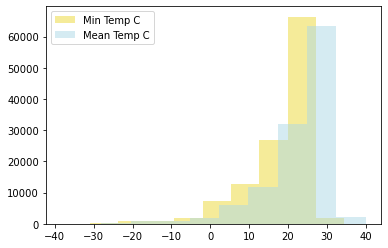

In [33]:
plt.hist(ww2_weath['MinTemp'],
         bins = 10,
         alpha=0.5, 
         color='#EDD834',
         label = 'Min Temp C')

plt.hist(ww2_weath['MeanTemp'],
        bins = 10,
        alpha = 0.5,
        color = 'lightblue',
        label = 'Mean Temp C')

plt.legend(loc = 'upper left')

plt.show()

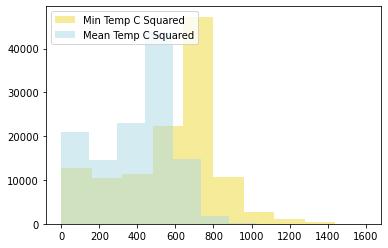

In [34]:
# These are a little left-skewed.  What will happen if we transform them?
ww2_weath['MinTempTransf2'] = ww2_weath[['MinTemp']]**2
ww2_weath['MeanTempTransf2'] = ww2_weath['MeanTemp']**2

plt.hist(ww2_weath['MeanTemp']**2,
         bins = 10,
         alpha=0.5, 
         color='#EDD834',
        label = 'Min Temp C Squared')

plt.hist((ww2_weath['MinTemp'])**2,
        bins = 10,
        alpha = 0.5,
        color = 'lightblue',
        label = 'Mean Temp C Squared')


plt.legend(loc = 'upper left')

#plt.show()

### 3.1 Impute values
#### We can't check the shape of the other continuous variables because they contain nulls, which the histogram can't handle.  We need to decide whether we should impute values for these nulls, or drop the records.  Ideally, we do not want to lose data.

In [35]:
# For this exercise, we will use the mean value to impute.  THis is one of the most "naive" imputation methods, unlike other
# methods that we will discuss in future lectures.
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [36]:
ww2_weath['WindGustSpd'] = ww2_weath['WindGustSpd'].fillna(ww2_weath['WindGustSpd'].mean())
ww2_weath['Snowfall'] = ww2_weath['Snowfall'].fillna(ww2_weath['Snowfall'].mean())
ww2_weath['DR'] = ww2_weath['DR'].fillna(ww2_weath['DR'].mean())
ww2_weath['SPD'] = ww2_weath['SPD'].fillna(ww2_weath['SPD'].mean())
ww2_weath['MEA'] = ww2_weath['MEA'].fillna(ww2_weath['MEA'].mean())
ww2_weath['MAX'] = ww2_weath['MAX'].fillna(ww2_weath['MAX'].mean())
ww2_weath['MIN'] = ww2_weath['MIN'].fillna(ww2_weath['MIN'].mean())
ww2_weath['SNF'] = ww2_weath['SNF'].fillna(ww2_weath['SNF'].mean())
ww2_weath['SND'] = ww2_weath['SND'].fillna(ww2_weath['SND'].mean())
ww2_weath['PGT'] = ww2_weath['PGT'].fillna(ww2_weath['PGT'].mean())

In [37]:
ww2_weath.isnull().sum(axis=0)

STA                    0
Date                   0
Precip                 0
WindGustSpd            0
MaxTemp                0
MinTemp                0
MeanTemp               0
Snowfall               0
YR                     0
MO                     0
DA                     0
PRCP                1932
DR                     0
SPD                    0
MAX                    0
MIN                    0
MEA                    0
SNF                    0
SND                    0
PGT                    0
TSHDSBRSGF         84770
MinTempTransf2         0
MeanTempTransf2        0
dtype: int64

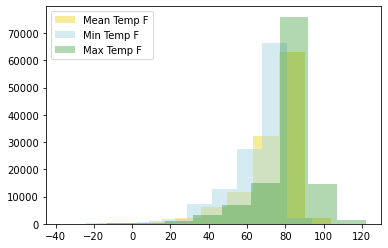

In [38]:
plt.hist(ww2_weath['MEA'],
         bins = 10,
         alpha=0.5, 
         color='#EDD834',
        label = 'Mean Temp F')

plt.hist(ww2_weath['MIN'],
        bins = 10,
        alpha = 0.5,
        color = 'lightblue',
        label = 'Min Temp F')

plt.hist(ww2_weath['MAX'],
        bins = 10,
        alpha = 0.3,
        color = 'green',
        label = 'Max Temp F')

plt.legend(loc = 'upper left')

plt.show()

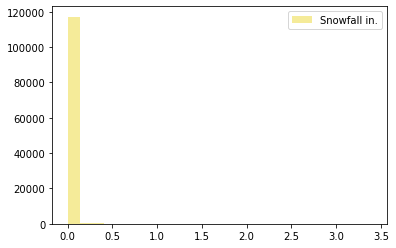

In [39]:
plt.hist(ww2_weath['SNF'],
         bins = 25,
         alpha=0.5, 
         color='#EDD834',
        label = 'Snowfall in.')

plt.legend(loc = 'upper right')

plt.show()

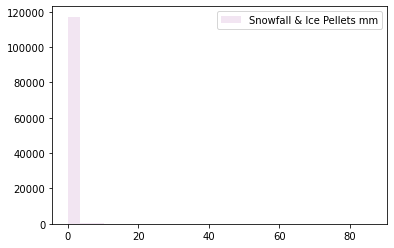

In [40]:
plt.hist(ww2_weath['Snowfall'],
        bins = 25,
        alpha = 0.1,
        color = 'purple',
        label = 'Snowfall & Ice Pellets mm')

plt.legend(loc = 'upper right')

plt.show()

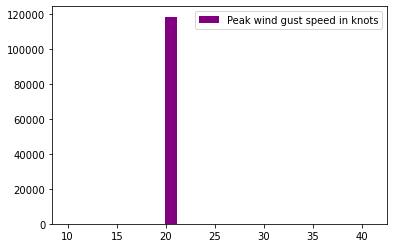

In [41]:
plt.hist(ww2_weath['SPD'],
        bins = 25,
        #alpha = 0.1,
        color = 'purple',
        label = 'Peak wind gust speed in knots')

plt.legend(loc = 'upper right')

plt.show()

In [42]:
ww2_weath[['SPD']].describe().T

,count,mean,std,min,25%,50%,75%,max
SPD,118996.0,20.396617,0.371438,10.0,20.396617,20.396617,20.396617,41.0


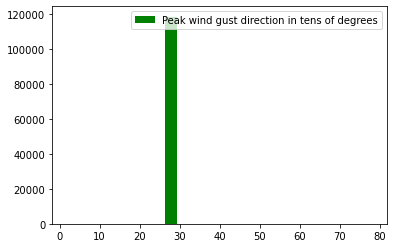

In [43]:
plt.hist(ww2_weath['DR'],
        bins = 25,
        #alpha = 0.1,
        color = 'green',
        label = 'Peak wind gust direction in tens of degrees')

plt.legend(loc = 'upper right')

plt.show()

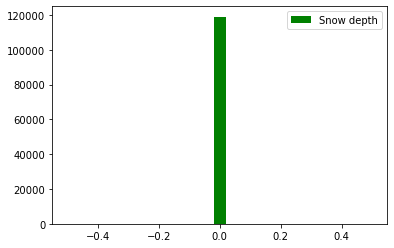

In [44]:
plt.hist(ww2_weath['SND'],
        bins = 25,
        #alpha = 0.1,
        color = 'green',
        label = 'Snow depth')

plt.legend(loc = 'upper right')

plt.show()

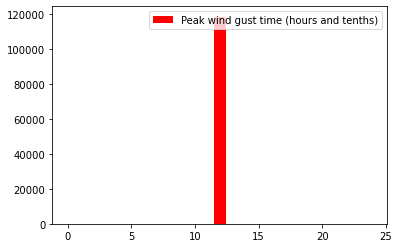

In [45]:
plt.hist(ww2_weath['PGT'],
        bins = 25,
        #alpha = 0.1,
        color = 'red',
        label = 'Peak wind gust time (hours and tenths)')

plt.legend(loc = 'upper right')

plt.show()

#### We can see that, for the fields with a significant number of null values, imputing the mean value has given the field almost no predictive power, as we will likely see in our predictive model.

## 4. Variable selection

### For this exercise, we will seek to predict the max temp by Celsius 

In [46]:
ww2_weath.isnull().sum(axis = 0)

STA                    0
Date                   0
Precip                 0
WindGustSpd            0
MaxTemp                0
MinTemp                0
MeanTemp               0
Snowfall               0
YR                     0
MO                     0
DA                     0
PRCP                1932
DR                     0
SPD                    0
MAX                    0
MIN                    0
MEA                    0
SNF                    0
SND                    0
PGT                    0
TSHDSBRSGF         84770
MinTempTransf2         0
MeanTempTransf2        0
dtype: int64

In [47]:
ww2_weath.dtypes

STA                 object
Date                object
Precip              object
WindGustSpd        float64
MaxTemp            float64
MinTemp            float64
MeanTemp           float64
Snowfall           float64
YR                   int64
MO                   int64
DA                   int64
PRCP                object
DR                 float64
SPD                float64
MAX                float64
MIN                float64
MEA                float64
SNF                float64
SND                float64
PGT                float64
TSHDSBRSGF          object
MinTempTransf2     float64
MeanTempTransf2    float64
dtype: object

In [48]:
ww2_weath.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF,MinTempTransf2,MeanTempTransf2
0,10001,1942-7-1,1.016,37.774534,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,26.998124,20.396617,78.0,72.0,75.0,0.0,0.0,12.085333,NaN,493.827160,570.679012
1,10001,1942-7-2,0,37.774534,28.888889,21.666667,25.555556,0.0,42,7,2,0,26.998124,20.396617,84.0,71.0,78.0,0.0,0.0,12.085333,NaN,469.444445,653.086420
2,10001,1942-7-3,2.54,37.774534,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,26.998124,20.396617,79.0,72.0,76.0,0.0,0.0,12.085333,NaN,493.827160,597.530864


### 4.1 Dropping highly correlated features

In [49]:
## First, let's look at highly correlated continuous variables
# Create correlation matrix
import seaborn as sns
ww2_weath_float_vars = ww2_weath[['WindGustSpd', 'MinTemp', 'MeanTemp', 'Snowfall', 'DR', 'SPD', 'MIN', 'MEA', 'SNF', 'SND', 'PGT']]
corr_matrix = ww2_weath_float_vars.corr().abs()
ww2_weath_float_vars.head(3)

,WindGustSpd,MinTemp,MeanTemp,Snowfall,DR,SPD,MIN,MEA,SNF,SND,PGT
0,37.774534,22.222222,23.888889,0.0,26.998124,20.396617,72.0,75.0,0.0,0.0,12.085333
1,37.774534,21.666667,25.555556,0.0,26.998124,20.396617,71.0,78.0,0.0,0.0,12.085333
2,37.774534,22.222222,24.444444,0.0,26.998124,20.396617,72.0,76.0,0.0,0.0,12.085333


In [50]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [51]:
# Select the upper part of the triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<AxesSubplot:>

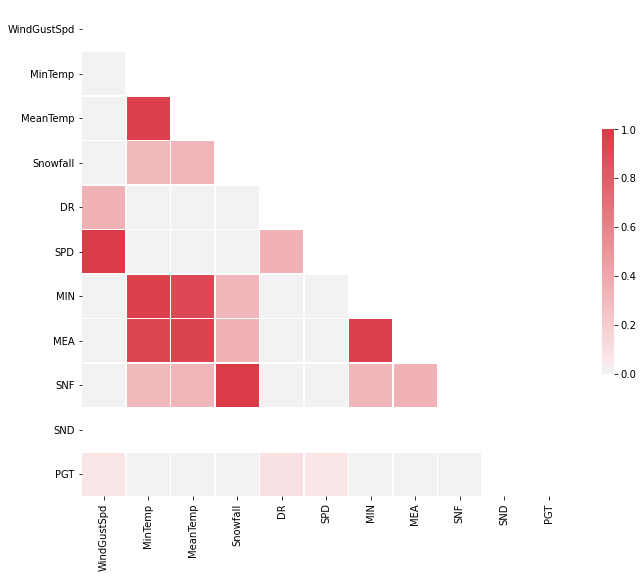

In [52]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
#We can also look at this in raw form:
corr_matrix

#We can see that the temperatures measured in C and F are highly correlated.  Given that the target is measure in C, 
# it is probably wise to not use the F Temperature columns as predictors

# We could, in theory, also check the correlation between the C temp features and F temp features with respect to the target

,WindGustSpd,MinTemp,MeanTemp,Snowfall,DR,SPD,MIN,MEA,SNF,SND,PGT
WindGustSpd,1.000000e+00,0.014547,0.006029,1.289474e-15,3.509761e-01,1.000000e+00,0.015103,0.006352,1.946774e-16,NaN,6.344282e-02
MinTemp,1.454723e-02,1.000000,0.965292,3.105900e-01,2.451488e-02,1.454723e-02,0.963219,0.930892,3.105900e-01,NaN,3.538512e-04
MeanTemp,6.029491e-03,0.965292,1.000000,3.266669e-01,1.245686e-02,6.029491e-03,0.917433,0.949199,3.266669e-01,NaN,6.645112e-04
Snowfall,1.289474e-15,0.310590,0.326667,1.000000e+00,1.077013e-15,1.080826e-15,0.322195,0.343977,1.000000e+00,NaN,2.293004e-16
DR,3.509761e-01,0.024515,0.012457,1.077013e-15,1.000000e+00,3.509761e-01,0.025451,0.013124,2.256650e-15,NaN,9.835302e-02
SPD,1.000000e+00,0.014547,0.006029,1.080826e-15,3.509761e-01,1.000000e+00,0.015103,0.006352,2.969031e-16,NaN,6.344282e-02
MIN,1.510272e-02,0.963219,0.917433,3.221947e-01,2.545099e-02,1.510272e-02,1.000000,0.966446,3.221947e-01,NaN,3.673631e-04
MEA,6.352188e-03,0.930892,0.949199,3.439775e-01,1.312355e-02,6.352188e-03,0.966446,1.000000,3.439775e-01,NaN,7.000757e-04
SNF,1.946774e-16,0.310590,0.326667,1.000000e+00,2.256650e-15,2.969031e-16,0.322195,0.343977,1.000000e+00,NaN,1.911208e-16
SND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Computing ANOVA F-value between each feature and the target vector

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [55]:
ww2_weather_vars = ww2_weath[['WindGustSpd', 'MinTemp', 'MeanTemp', 'Snowfall', 'DR', 'SPD', 'SNF', 'SND', 'PGT'
                              #, 'STA'
                             ]]

In [56]:
target = ww2_weath[['MaxTemp']]

In [57]:
target.head(3)

,MaxTemp
0,25.555556
1,28.888889
2,26.111111


In [58]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_regression, k=2)

In [59]:
np.seterr(divide='ignore', invalid='ignore')
# c:\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
#  corr /= X_norms
X_kbest = fvalue_selector.fit_transform(ww2_weather_vars, target.values.ravel())

In [60]:
# Show results
print('Original number of features:', ww2_weather_vars.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 9
Reduced number of features: 2


In [61]:
X_kbest.shape

(118996, 2)

In [62]:
# We can see that X_kbest is an array
X_kbest

array([[22.22222222, 23.88888889],
       [21.66666667, 25.55555556],
       [22.22222222, 24.44444444],
       ...,
       [18.33333333, 23.33333333],
       [18.33333333, 23.33333333],
       [17.22222222, 23.33333333]])

In [63]:
# We can convert X_kbest to a dataframe
X_kbest = pd.DataFrame(X_kbest)
X_kbest.head(3)

,0,1
0,22.222222,23.888889
1,21.666667,25.555556
2,22.222222,24.444444


In [64]:
ww2_weather_vars.head(3)

,WindGustSpd,MinTemp,MeanTemp,Snowfall,DR,SPD,SNF,SND,PGT
0,37.774534,22.222222,23.888889,0.0,26.998124,20.396617,0.0,0.0,12.085333
1,37.774534,21.666667,25.555556,0.0,26.998124,20.396617,0.0,0.0,12.085333
2,37.774534,22.222222,24.444444,0.0,26.998124,20.396617,0.0,0.0,12.085333


In [65]:
# We can see that MinTemp and MeanTemp are the most relevant features for this test

## 5. Model Creation
### 5.1 Split data into trianing and test sets

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ww2_weather_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

### 5.2 Linear Model

In [67]:
from sklearn import linear_model

In [68]:
# Create an object that is an ols regression
ols = linear_model.LinearRegression()

In [69]:
# Train the model using our training data
model = ols.fit(x_train, y_train)

In [70]:
x_train.head(3)

,WindGustSpd,MinTemp,MeanTemp,Snowfall,DR,SPD,SNF,SND,PGT
73357,37.774534,11.666667,19.444444,0.0,26.998124,20.396617,0.0,0.0,12.085333
42542,37.774534,23.333333,25.000000,0.0,26.998124,20.396617,0.0,0.0,12.085333
80464,37.774534,11.111111,16.666667,0.0,26.998124,20.396617,0.0,0.0,12.085333


In [71]:
# View the training model's coefficient
model.coef_

array([[-4.31687815e+09, -8.93438339e-01,  1.88500702e+00,
        -9.37016339e+01, -9.06467438e-03,  7.99485834e+09,
         2.37965272e+03,  0.00000000e+00,  2.63768435e-03]])

In [72]:
model.score(x_train, y_train)

0.9892697321997305

In [73]:
model.score(x_test, y_test)

0.9781084927268188

In [74]:
# Run the model on X_test and show the first five results
list(model.predict(x_test)[0:5])

[array([-0.62851066]),
 array([30.22100716]),
 array([30.55383187]),
 array([29.11926156]),
 array([32.48470956])]

In [75]:
y_test[0:5]

,MaxTemp
47534,-0.555556
35851,30.555556
28719,30.555556
50520,29.444444
69440,32.777778


#### 5.2.1 RSS / MSE / R2 / Adjusted R2

In [76]:
# Apply the model we created using the training data to the test data, and calculate the RSS.
((y_test.values - model.predict(x_test)) **2).sum()

38552.45787206432

In [77]:
# For MSE:
np.mean((y_test.values - model.predict(x_test)) **2)

1.6198511710951395

In [78]:
# For R2
from sklearn.metrics import r2_score
r2_score(y_train.values, model.predict(x_train)) 

0.9892697321997305

In [79]:
r2 = r2_score(y_test.values, model.predict(x_test)) 
r2

0.9781084927268188

In [80]:
# To calculate adjusted R2
adjusted_r_squared = 1 - (1-r2)*(len(y_test['MaxTemp'])-1)/(len(y_test['MaxTemp'])-x_test.shape[1]-1)
adjusted_r_squared

0.9781002109460093

## 6. LASSO for feature selection

#### The hyperparameter, α, lets us control how much we penalize the coefficients, with higher values of α creating simpler modelers. The ideal value of α should be tuned like any other hyperparameter. In scikit-learn, α is set using the alpha parameter.

In [81]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(ww2_weather_vars), 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [83]:
#from sklearn.linear_model import Lasso
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_std = scaler.fit_transform(x_train)
#Remember, we ONLY are using continuous variables in this analysis.  The scaler cannot and should not be used with categorical features

In [84]:
#X_std

In [85]:
# Create lasso regression with alpha value
regr = Lasso(alpha=0.5)

In [86]:
regr

Lasso(alpha=0.5)

In [87]:
# Fit the linear regression
lasso_model = regr.fit(x_train, y_train)

In [88]:
lasso_model

Lasso(alpha=0.5)

In [89]:
print(lasso_model.coef_, lasso_model.intercept_)

[-0.         -0.          7.94848083 -0.         -0.         -0.
 -0.          0.         -0.        ] [27.05217019]


In [90]:
# As we discussed in our lecture, alpha is a hyperparemter.  To find the best hyperparameter, we should use grid-search.
# We can do this for LASSO with LASSO CV
from sklearn.linear_model import LassoCV

In [91]:
lasso_cv = LassoCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

5,10,15,200

In [92]:
# Fit the linear regression
model_cv = lasso_cv.fit(x_train, y_train.values.ravel())

In [93]:
# To find the best alpha: 
model_cv.alpha_

0.01

## 7. Ridge Cross Validation

In [94]:
from sklearn.linear_model import RidgeCV

In [95]:
ridge_cv = RidgeCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

In [96]:
# Fit the linear regression
ridge_model_cv = ridge_cv.fit(x_train, y_train)

In [97]:
# To find the best alpha: 
model_cv.alpha_

0.01